In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
#loading dataset
data=pd.read_csv('/content/Experience-Salary.csv')

In [4]:
# reading data
data.head()

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


In [5]:
# basic data understanding
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   exp(in months)        1000 non-null   float64
 1   salary(in thousands)  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [6]:
data.describe()

,exp(in months),salary(in thousands)
count,1000.000000,1000.000000
mean,26.157825,26.722597
std,8.717091,8.844761
min,0.697594,-1.276342
25%,20.073600,20.531008
50%,25.875225,26.745576
75%,32.406986,32.615753
max,49.463222,55.297016


In [10]:
# convert experience to years
data['exp(in years)'] = data['exp(in months)']/12

In [24]:
data.head(15)

,exp(in months),salary(in thousands),exp(in years)
0,18.290293,16.521825,1.524191
1,17.023407,11.666234,1.418617
2,26.343613,23.167255,2.195301
3,19.105834,20.877145,1.592153
4,27.742516,23.166236,2.311876
5,31.671171,32.966251,2.639264
6,14.186399,15.294170,1.182200
7,29.932845,33.159461,2.494404
8,32.841327,32.032653,2.736777
9,26.873869,32.347784,2.239489


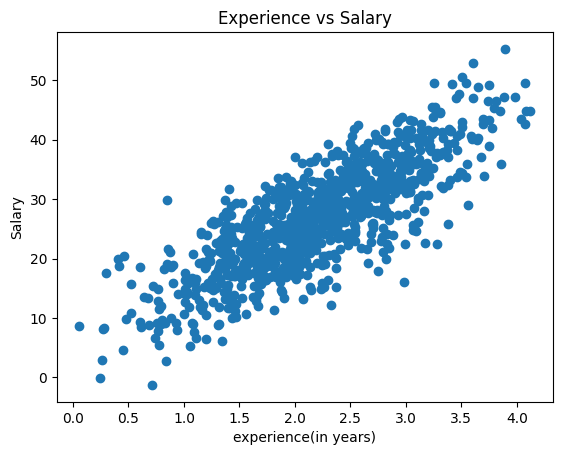

In [12]:
plt.scatter(data['exp(in years)'],data['salary(in thousands)'])
plt.xlabel("experience(in years)")
plt.ylabel("Salary")
plt.title("Experience vs Salary")
plt.show()

In [13]:
# define features and target

X=data[['exp(in years)']]
y=data['salary(in thousands)']


In [14]:
# train-test split

X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
    )

In [30]:
# baseline of the model
baseline_prediction=y_train.mean()
print("baseline of the model:" ,baseline_prediction)

baseline of the model: 26.611565316505512


In [15]:
# build linear regression model
model=LinearRegression()


In [16]:
# fitting the model
model.fit(X_train , y_train)

LinearRegression()

In [18]:
# model parameters
print("Intercept:" , model.intercept_)
print("Coefficient:" , model.coef_[0])

Intercept: 4.911177097709846
Coefficient: 10.003295888468438


In [19]:
# make predictions
y_pred=model.predict(X_test)

In [20]:
# model evaluation

print("Mean Squared Error:" , mean_squared_error(y_test,y_pred))
print("R-squared:" , r2_score(y_test,y_pred))
print("RMSE:" , np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Squared Error: 27.650268732842278
R-squared: 0.6208258933084713
RMSE: 5.2583522830676035


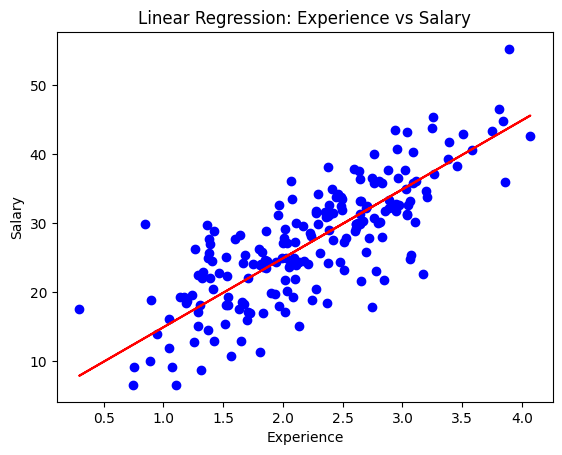

In [31]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Linear Regression: Experience vs Salary")
plt.show()


In [34]:
# predict salary
new_experience = pd.DataFrame({'exp(in years)': [7]})
predicted_salary = model.predict(new_experience)

print("Predicted Salary:", predicted_salary[0])

Predicted Salary: 74.93424831698891
